In [1]:
#Algorithm based Missing value imputation.
#Consider the impact of other variables on missing value n imputes accordingly.
#Mice: Multiariate Imputation using chained equations.
#Siultaneosuly imputes both Numeric and non numeric missing values.
#Chained equations wherein the missing value column/varaible is treated
#as dependent variable and relevent classification/regression model is 
#build and prediction done
#Missing value will be replaced with predicted value.
#Python-sklearn Iterative impute(experimental phase)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import io
%cd "C:\Users\Irshad\Desktop\PGA28\Datasets\Flu shot learning"

C:\Users\Irshad\Desktop\PGA28\Datasets\Flu shot learning


In [8]:
flutrain=pd.read_csv("training_set_features.csv")

In [10]:
flutest=pd.read_csv("test_set_features.csv")

In [14]:
flulabels=pd.read_csv("training_set_labels.csv")

In [15]:
print(flutrain.shape)
print(flutest.shape)
print(flulabels.shape)

(26707, 36)
(26708, 36)
(26707, 3)


In [16]:
flutrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

In [34]:
# Combine both dataframes for preprocessing
combinedf=pd.concat([flutrain,flutest],axis=0)

In [35]:
combinedf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53415 entries, 0 to 26707
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                53415 non-null  int64  
 1   h1n1_concern                 53238 non-null  float64
 2   h1n1_knowledge               53177 non-null  float64
 3   behavioral_antiviral_meds    53265 non-null  float64
 4   behavioral_avoidance         52994 non-null  float64
 5   behavioral_face_mask         53377 non-null  float64
 6   behavioral_wash_hands        53333 non-null  float64
 7   behavioral_large_gatherings  53256 non-null  float64
 8   behavioral_outside_home      53251 non-null  float64
 9   behavioral_touch_face        53159 non-null  float64
 10  doctor_recc_h1n1             49095 non-null  float64
 11  doctor_recc_seasonal         49095 non-null  float64
 12  chronic_med_condition        51512 non-null  float64
 13  child_under_6_mo

In [36]:
combinedf=combinedf.drop('respondent_id', axis=1)

In [37]:
# For using Iterative Imputer in sklearn which is experimental as of now 
# 1) remove variables or columns not needed
# 2) Lbel


In [38]:
combinedf.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [40]:
from sklearn.preprocessing import LabelEncoder

In [41]:
original=combinedf

In [42]:
mask=combinedf.isnull()

In [43]:
combinedf=combinedf.astype(str).apply(LabelEncoder().fit_transform)

In [44]:
combinedf=combinedf.where(~mask,original)

In [45]:
combinedf.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,1,0,0,0,0,0,0,1,1,0,...,2,1,0,1,8,2,0,0,NaN,NaN
1,3,2,0,1,0,1,0,1,1,0,...,2,1,1,0,1,0,0,0,13,20
2,1,1,0,1,0,0,0,0,0,NaN,...,0,1,0,0,9,0,2,0,15,22
3,1,1,0,1,0,1,1,0,0,0,...,2,1,1,1,5,1,0,0,NaN,NaN
4,2,1,0,1,0,1,1,0,1,0,...,0,0,0,0,9,0,1,0,19,5


In [46]:
from sklearn.experimental import enable_iterative_imputer

In [47]:
from sklearn.impute import IterativeImputer
from sklearn.tree import DecisionTreeClassifier

In [48]:
imputer=IterativeImputer(estimator=DecisionTreeClassifier(),
                        initial_strategy="most_frequent",
                        max_iter=20)

In [49]:
combinedf_impute=imputer.fit_transform(combinedf)

C:\Users\Irshad\anaconda3\lib\site-packages\sklearn\impute\_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)
C:\Users\Irshad\anaconda3\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [50]:
combinedf_impute=pd.DataFrame(combinedf_impute,columns=combinedf.columns)

<AxesSubplot:>

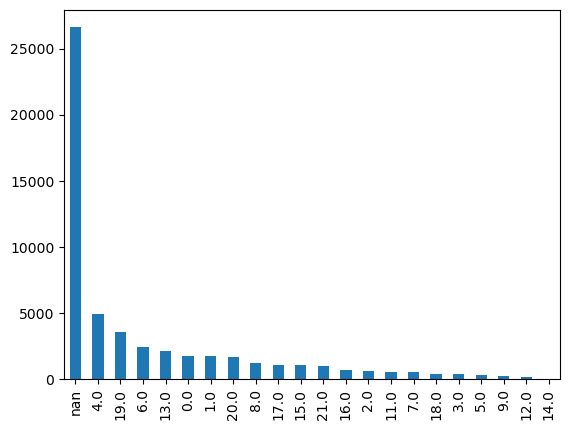

In [52]:
combinedf.employment_industry.value_counts(dropna=False).plot(kind="bar")

<AxesSubplot:>

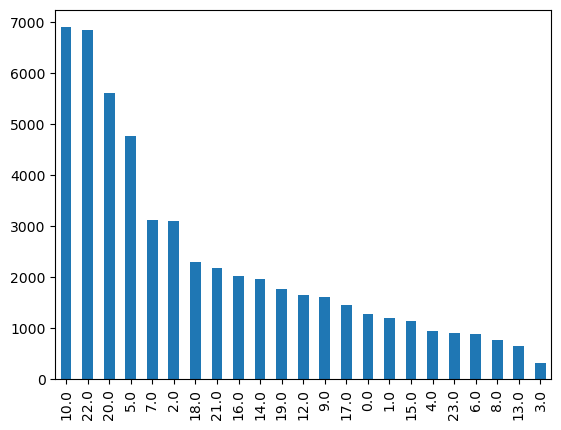

In [51]:
combinedf_impute.employment_occupation.value_counts(dropna=False).plot(kind="bar")

In [62]:
#Split Data back to train n test
flu_train=combinedf_impute.loc[0:26706]

In [65]:
flu_test=combinedf_impute.loc[26707:53414]

In [66]:
print(flu_train.shape)
print(flutrain.shape)
print(flu_test.shape)
print(flutest.shape)

(26707, 35)
(26707, 36)
(26708, 35)
(26708, 36)


In [67]:
y=flulabels.seasonal_vaccine

In [68]:
X=flu_train

<AxesSubplot:>

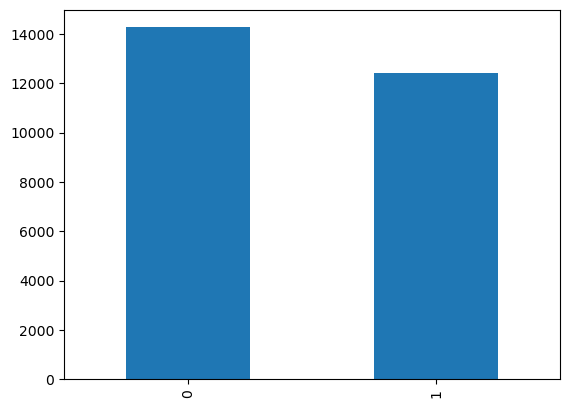

In [69]:
y.value_counts().plot(kind='bar')

In [70]:
y.shape

(26707,)

In [ ]:
#Build the following - Score, predct, Classification Report, Roc Curve
# Binary Logistic Regression
# Decision Tree
# Random Forest
# Gradient boosting
# Naive Bayes
# Support Vector Machine

In [83]:
from sklearn.metrics import classification_report,RocCurveDisplay
from sklearn.linear_model import LogisticRegression

In [84]:
logit=LogisticRegression(max_iter=2000)

In [85]:
logitmodel=logit.fit(X,y)

In [86]:
logitmodel.score(X,y)

0.7720447822668214

In [87]:
logitpredict=logitmodel.predict(X)

In [88]:
pd.crosstab(y,logitpredict)

col_0,0,1
seasonal_vaccine,,
0,11523,2749
1,3339,9096


In [89]:
print(classification_report(y,logitpredict))

              precision    recall  f1-score   support

           0       0.78      0.81      0.79     14272
           1       0.77      0.73      0.75     12435

    accuracy                           0.77     26707
   macro avg       0.77      0.77      0.77     26707
weighted avg       0.77      0.77      0.77     26707



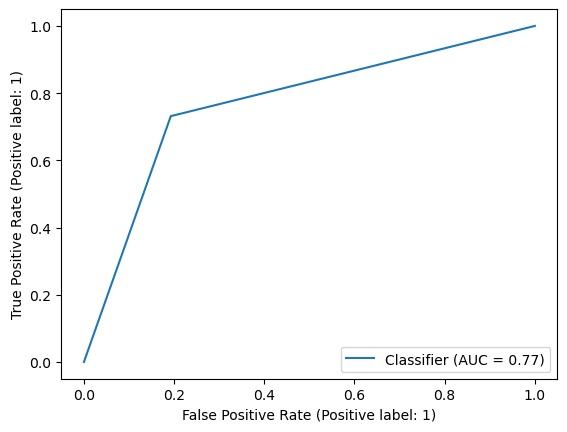

In [82]:
RocCurveDisplay.from_predictions(y,logitpredict)

In [90]:
from sklearn.tree import DecisionTreeClassifier

In [94]:
tree=DecisionTreeClassifier(max_depth=10)

In [95]:
treemodel=tree.fit(X,y)

In [96]:
treemodel.score(X,y)

0.8140936833040027

In [97]:
from sklearn.model_selection import cross_val_score

In [98]:
cross_val_score(tree,X,y)

array([0.7368027 , 0.7411082 , 0.7457405 , 0.74555327, 0.73637896])

In [99]:
np.mean([0.7368027 , 0.7411082 , 0.7457405 , 0.74555327, 0.73637896])

0.741116726

In [110]:
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier(n_estimators=1000,max_depth=12)

In [111]:
RFmodel=RF.fit(X,y)

In [112]:
RFmodel.score(X,y)

0.8678249148163403

In [113]:
from sklearn.ensemble import GradientBoostingClassifier

In [117]:
gbm=GradientBoostingClassifier(n_estimators=3000)

In [118]:
gbmmodel=gbm.fit(X,y)

In [119]:
gbmmodel.score(X,y)

0.8407908039090876

In [120]:
gbmpredict=gbmmodel.predict(X)

In [121]:
pd.crosstab(y,gbmpredict)

col_0,0,1
seasonal_vaccine,,
0,12193,2079
1,2173,10262


In [ ]:
#Conclusion:
#I entered the predicted test values into the competition Flu Shot Learning:
#Predict Seasonal Flu Vaccines on the driven.org website of all the models
#The most Accurate Classification method is Random Forest.